In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img
%matplotlib inline

In [2]:
N = 8
IMAGE_PATH = "crack_2.jpg"

In [3]:
def range2D(n):
  indexes = []
  for i in range(0, n):
    for j in range(0, n):
      indexes.append((i, j))
  return indexes

In [4]:
def alpha(p):
  return 1/np.sqrt(N) if p == 0 else np.sqrt(2/N)

def cos_basis(i,j):
  def cal_result(a):
    x=a[0]
    y=a[1]
    
    return alpha(i) * alpha(j) * np.cos((2*x+1) * i * np.pi/(2*N)) *  np.cos((2*y+1) * j * np.pi/(2*N)) 
  return cal_result

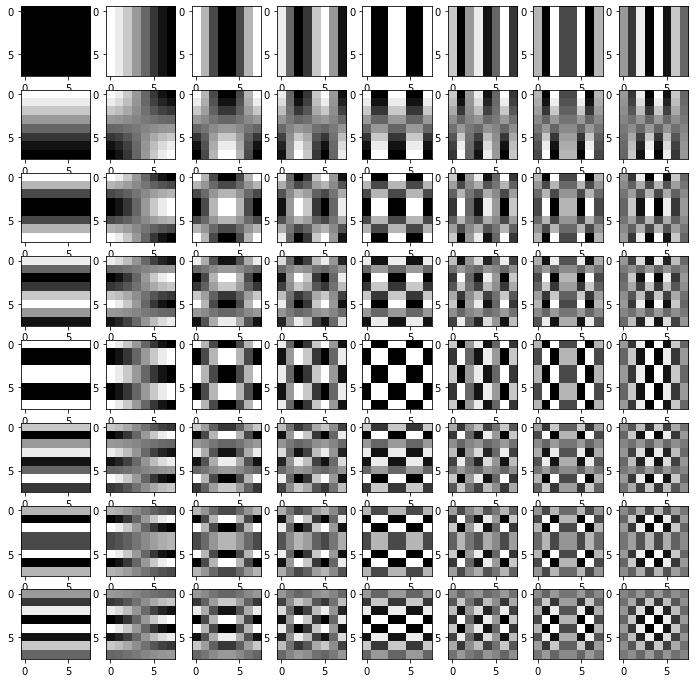

In [5]:
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(12)
xy_range = range2D(N)
xy_plane_NxN = (np.array(xy_range).reshape(N,N,2))

for i in range(0, N):
  for j in range(0, N):
    xy_result = np.apply_along_axis(cos_basis(i,j), -1, xy_plane_NxN)
    plt.subplot(N, N, 1+ N*i + j)
    plt.imshow(xy_result, cmap="gray")

In [6]:
xy_result = np.apply_along_axis(cos_basis(0,0), -1, xy_plane_NxN)
print(xy_result)

[[0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
 [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
 [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
 [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
 [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
 [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
 [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
 [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]]


##### plot_result = basis(0,0)(xy_plane_NxN)

In [7]:
U = np.zeros((N,N))

In [8]:
for i in range(0, N):
  for j in range(0, N):
    U[i, j] = alpha(j) * np.cos((2*i+1)*j*np.pi/(2*N))

In [9]:
U_t =  U.transpose()

In [10]:
np.matmul(U, U_t) # indeed identity 

array([[ 1.00000000e+00, -1.01506949e-16, -3.78598224e-17,
        -1.03614850e-17, -1.33831237e-16,  7.88118312e-17,
         2.00856868e-16, -1.70562493e-16],
       [-1.01506949e-16,  1.00000000e+00,  1.70298111e-17,
        -1.13980777e-17,  1.37840552e-16, -2.88419699e-16,
        -1.24636773e-16,  2.51800326e-17],
       [-3.78598224e-17,  1.70298111e-17,  1.00000000e+00,
        -1.61419161e-16, -2.81922100e-17, -1.25319880e-16,
        -1.83252893e-16, -2.79432802e-17],
       [-1.03614850e-17, -1.13980777e-17, -1.61419161e-16,
         1.00000000e+00, -1.92659768e-17,  2.75108042e-16,
         2.02487213e-16,  2.22263103e-18],
       [-1.33831237e-16,  1.37840552e-16, -2.81922100e-17,
        -1.92659768e-17,  1.00000000e+00, -8.54966705e-17,
        -2.36183557e-17, -3.71508058e-16],
       [ 7.88118312e-17, -2.88419699e-16, -1.25319880e-16,
         2.75108042e-16, -8.54966705e-17,  1.00000000e+00,
         1.21575873e-16,  8.41357861e-17],
       [ 2.00856868e-16, -1.246367

In [11]:
def create_mask(closure):
  mask = np.zeros((N, N))
  for i in range(N):
    for j in range(N):
      if closure(i,j):
        mask[i, j] = 1
  return mask

In [12]:
original = load_img(IMAGE_PATH, target_size=(512, 512), color_mode="grayscale")
original = img_to_array(original).astype("uint8")
original = np.squeeze(original)
original.shape

(512, 512)

[[0. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


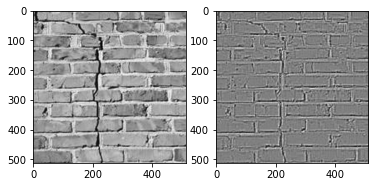

In [21]:
mask = create_mask(lambda i,j: 1<=i+j<=3)
print(mask)
steps = int(original.shape[0]/N) # we choose 512x512 image, there fore steps = 64
compressed = np.zeros_like(original)

for x in range(steps):
  for y in range(steps):
    sub_pixels = original[N * y: N*(y+1), N * x: N*(x+1)]
    sub_pixels = sub_pixels - 127.5
    fourier_coefficients = np.matmul(np.matmul(U_t, sub_pixels), U)
    fourier_coefficients = fourier_coefficients * mask 
    reverted_pixels = np.matmul(np.matmul(U, fourier_coefficients), U_t)
    reverted_pixels = reverted_pixels + 127.5
    compressed[N * y: N*(y+1), N * x: N*(x+1)] = reverted_pixels
    
fig.set_figheight(20)
fig.set_figwidth(20)
plt.subplot(1, 2, 1)
plt.imshow(original, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(compressed, cmap="gray")
plt.savefig("DCT_result", dpi=200, bbox_inches="tight")

In [14]:
compressed

array([[124, 114, 112, ..., 153, 157, 158],
       [119, 110, 109, ..., 151, 155, 156],
       [111, 104, 106, ..., 147, 151, 152],
       ...,
       [114, 115, 118, ..., 127, 130, 135],
       [113, 114, 117, ..., 140, 147, 155],
       [115, 116, 118, ..., 147, 158, 168]], dtype=uint8)